# Import the most important modules.
Blaaa

In [2]:
import keras
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  )

C:\Users\Dennis1\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = ("c:/Users/Dennis1/ki/testse")
train_dir = ("c:/Users/Dennis1/ki/testse/train")
validation_dir = ("c:/Users/Dennis1/ki/testse/validate")
test_dir = ("c:/Users/Dennis1/ki/testse/test")
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
        
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 200)
validation_features, validation_labels = extract_features(validation_dir, 100)
test_features, test_labels = extract_features(test_dir, 100)



Found 1200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [4]:
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0.0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0)

In [5]:
train_features = np.reshape(train_features, (200, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (100, 4 * 4 * 512))
test_features = np.reshape(test_features, (100, 4 * 4 * 512))

# Creating the network.
Bla...


In [6]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()
#visuelL
history = model.fit(train_features, train_labels,
                    epochs=40,
                    batch_size=10,
                    validation_data=(validation_features, validation_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                524352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 524,417
Trainable params: 524,417
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 100 samples
Epoch 1/40
200/200 [==============================] - 1s 3ms/step - loss: 0.7349 - acc: 0.5200 - val_loss: 0.6338 - val_acc: 0.6000
Epoch 2/40
200/200 [==============================] - 0s 1ms/step - loss: 0.6296 - acc: 0.6700 - val_loss: 0.5935 - val_acc: 0.7700
Epoch 3/40
200/200 [==============================] - 0s 1ms/step - loss: 0.5860 - acc: 0.

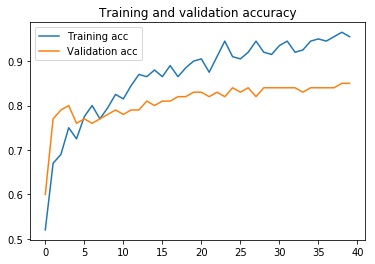

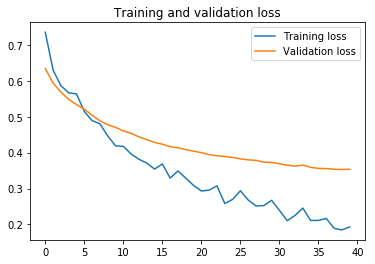

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import time

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("Training Acc-"+str((int(time.time())))+".png", dpi=300, bbox_inches='tight')
plt.figure()

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("Training Loss-"+str((int(time.time())))+".png", dpi=300, bbox_inches='tight')
plt.show()


In [54]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [1]:
from PIL import Image
from random import randint
import glob
import random
import sys

numberTrain = 6
numberValidate = 1
numberTest = 1

numberTiles = 100

picSum = numberTrain + numberValidate + numberTest

rooms = ["Raum1", "Raum2", "other"]
primes = ["train", "validate", "test"]

for room in rooms:
    
    path= ("Original Dataset/"+ room)
    picPaths = glob.glob(path+"/*")
    random.shuffle(picPaths)
    
    for prime in primes:
    
        
        for NumberPictures in range(picSum):
            print(str(NumberPictures))
            print(picPaths[NumberPictures])
            if NumberPictures<numberTrain and prime == "train" or NumberPictures>=numberTrain and NumberPictures<(numberTrain+numberValidate) and prime== "validate" or NumberPictures>=numberTrain+numberValidate and NumberPictures< picSum and prime =="test":
    
               
            
                
                
                
                


                if len(picPaths) < picSum:
                   sys.exit("Not Enough Pictures!")


                for NumberTile in range(numberTiles):


                    img = Image.open(picPaths[NumberPictures])
                    width = img.size[0]
                    height = img.size[1]


                    randomSize = (randint(1000, 1600))
                    randomWidth =(randint(0, width-randomSize))
                    randomHeight = (randint(0, height-randomSize))




                    img3 = img.crop(
                        (
                        randomWidth ,
                        randomHeight,
                        randomWidth+ randomSize,
                        randomHeight+ randomSize,
                    )
                    )
                    img3.save("testse/"+prime+"/"+room+"/"+str(NumberTile+1+(NumberPictures*(numberTiles+1)))+".jpg")
                    


0
Original Dataset/Raum1\10.jpg
1
Original Dataset/Raum1\4.jpg
2
Original Dataset/Raum1\3.jpg
3
Original Dataset/Raum1\5.jpg
4
Original Dataset/Raum1\12.jpg
5
Original Dataset/Raum1\6.jpg
6
Original Dataset/Raum1\1.jpg
7
Original Dataset/Raum1\8.jpg
0
Original Dataset/Raum1\10.jpg
1
Original Dataset/Raum1\4.jpg
2
Original Dataset/Raum1\3.jpg
3
Original Dataset/Raum1\5.jpg
4
Original Dataset/Raum1\12.jpg
5
Original Dataset/Raum1\6.jpg
6
Original Dataset/Raum1\1.jpg
7
Original Dataset/Raum1\8.jpg
0
Original Dataset/Raum1\10.jpg
1
Original Dataset/Raum1\4.jpg
2
Original Dataset/Raum1\3.jpg
3
Original Dataset/Raum1\5.jpg
4
Original Dataset/Raum1\12.jpg
5
Original Dataset/Raum1\6.jpg
6
Original Dataset/Raum1\1.jpg
7
Original Dataset/Raum1\8.jpg
0
Original Dataset/Raum2\9.jpg
1
Original Dataset/Raum2\2.jpg
2
Original Dataset/Raum2\6.jpg
3
Original Dataset/Raum2\3.jpg
4
Original Dataset/Raum2\4.jpg
5
Original Dataset/Raum2\1.jpg
6
Original Dataset/Raum2\7.jpg
7
Original Dataset/Raum2\8.jpg
0


FileNotFoundError: [Errno 2] No such file or directory: 'testse/validate/other/607.jpg'

In [ ]:
import glob

In [22]:
import random

In [31]:
 paths = glob.glob("testse/train/Raum1/*")

In [32]:
print(paths)

['testse/train/Raum1\\0.jpg', 'testse/train/Raum1\\1.jpg', 'testse/train/Raum1\\2.jpg', 'testse/train/Raum1\\3.jpg', 'testse/train/Raum1\\4.jpg']


In [23]:
random.shuffle(paths) 

In [24]:
print(paths)

['testse/train\\other', 'testse/train\\Raum2', 'testse/train\\Raum1']


In [30]:
print(paths[0])

testse/train\other


In [35]:
img.close();